# Assignment 4-2 Image Processing

In [153]:
import cv2 # workswith images 
from matplotlib import pyplot # for visualisation

import numpy as np

import skimage.measure

## Load your image here with preferred color conversion

In [167]:
# load your image, 0 is for greyscale mode
img = cv2.imread('Images/Mario2.jpg', 0)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

### Methods

In [104]:
# visualisation function with forced grayscale
def myimage(image):
    # image view
    #pyplot.imshow(image)
    pyplot.imshow(img, cmap="gray", vmin=0, vmax=255)# pixel view with grayscale
    print('image size: ', image.shape)
    print('pixel matrix:\n', image)

In [105]:
# visualisation function with color
def myimagecolor(image):
    # image view
    pyplot.imshow(image)
    #pyplot.imshow(img, cmap="gray", vmin=0, vmax=255)# pixel view with grayscale
    print('image size: ', image.shape)
    print('pixel matrix:\n', image)

In [106]:
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

### Run

image size:  (100, 100)
pixel matrix:
 [[152 152 152 ... 152 152 152]
 [152 152 152 ... 152 152 152]
 [152 152 152 ... 152 152 152]
 ...
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]]


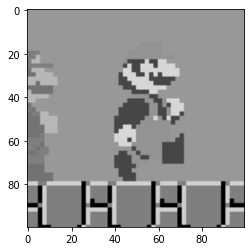

In [107]:
# show the original image
myimage(img)

image size:  (487, 999)
pixel matrix:
 [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 252 254 255]
 [255 255 255 ... 254 255 255]
 [255 255 255 ... 255 255 252]]


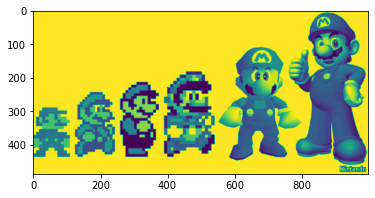

In [127]:
# show the original image with color
myimagecolor(img)

In [108]:
# resize the image
SIZE = 32
img = cv2.resize(img, (SIZE,SIZE))

image size:  (32, 32)
pixel matrix:
 [[152 152 152 ... 152 152 152]
 [152 152 152 ... 152 152 152]
 [152 152 152 ... 152 152 152]
 ...
 [208 169 208 ... 208 208 208]
 [127 103 208 ... 208 127 127]
 [127 103 208 ... 208 127 127]]


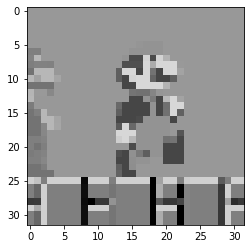

In [109]:
# show the resized image
myimage(img)

image size:  (487, 999)
pixel matrix:
 [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 252 254 255]
 [255 255 255 ... 254 255 255]
 [255 255 255 ... 255 255 252]]


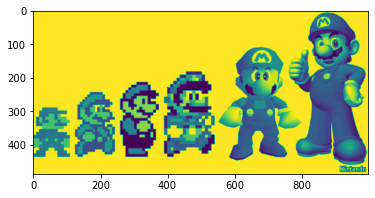

In [128]:
# show the resized image in color
myimagecolor(img)

### a)

In [129]:
# Take the image which is at 32 by 32 pixels and randomize the color values
cv2.randu(img, 0, 255) 
# This creates the matrix the assignment asks for

array([[215, 137, 163, ...,   3, 103, 169],
       [117,  51,  48, ...,  84, 205, 154],
       [ 37,  54, 217, ..., 114,  54,  56],
       ...,
       [202, 112, 107, ..., 159, 116,  19],
       [209, 127,  47, ..., 186, 112, 173],
       [ 33, 183,  44, ...,  49, 231, 167]], dtype=uint8)

image size:  (487, 999)
pixel matrix:
 [[215 137 163 ...   3 103 169]
 [117  51  48 ...  84 205 154]
 [ 37  54 217 ... 114  54  56]
 ...
 [202 112 107 ... 159 116  19]
 [209 127  47 ... 186 112 173]
 [ 33 183  44 ...  49 231 167]]


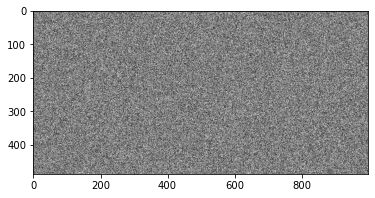

In [130]:
myimage(img)

image size:  (487, 999)
pixel matrix:
 [[215 137 163 ...   3 103 169]
 [117  51  48 ...  84 205 154]
 [ 37  54 217 ... 114  54  56]
 ...
 [202 112 107 ... 159 116  19]
 [209 127  47 ... 186 112 173]
 [ 33 183  44 ...  49 231 167]]


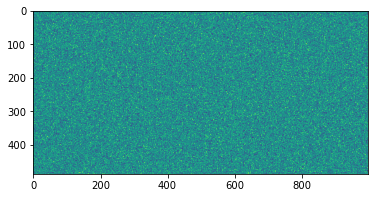

In [131]:
myimagecolor(img)

### b)

In [132]:
kernelHorizontal = np.array([[-1, -1, -1],
                           [2, 2, 2],
                           [-1, -1, -1]])

In [133]:
kernelVertical = np.array([[-1, 2, -1],
                           [-1, 2, -1],
                           [-1, 2, -1]])

In [140]:
kernelEdges = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

At this point, rewrite the method call to get the output image you want to see. <br>
Alternatively refresh the img variable with whatever image you want to work on. <br>
We chose to work on the Mario2.jpg and so we ran that cell up top again.

In [166]:
# Convolve and Save Output
#pyplot.imshow(convolve2D(img, kernelHorizontal, 0), cmap="gray", vmin=0, vmax=255)
output = convolve2D(img, kernelEdges, 0)
cv2.imwrite('Output/2DConvolvedEdges.jpg', output)

True

### c) & d) <br>
Husk at refreshe din img variabel på det du vil teste på.

image size:  (50, 50)
pixel matrix:
 [[152 152 152 ... 152 152 152]
 [152 152 152 ... 152 152 152]
 [152 152 152 ... 152 152 152]
 ...
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]]


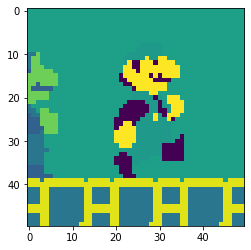

In [161]:
myimagecolor(skimage.measure.block_reduce(img, (2,2), np.max))

Husk at ændre output navnet, hvis du ønsker ikke at overskrive den forrige fil.

In [168]:
cv2.imwrite('Output/2DMaxPoolLARGE.jpg', skimage.measure.block_reduce(img, (2,2), np.max))

True